In [1]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# utils
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing 

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
#Data Link:  https://www.kaggle.com/datasets/stefanoleone992/ea-sports-fc-24-complete-player-dataset?select=male_players.csv
data=pd.read_csv('player_stats.csv',encoding='latin-1', sep=',', index_col=False, dtype='unicode')

data = data[data["update_as_of"] == "2023-09-22"]

# data.to_csv()

KeyError: 'update_as_of'

In [14]:
data = data.drop(['player_url','fifa_version','fifa_update','player_url','update_as_of','club_team_id','long_name','league_id','league_level','club_loaned_from','club_joined_date',
 'club_contract_valid_until_year',
 'nationality_id','nation_team_id','international_reputation','player_tags','dob','goalkeeping_speed',
 'player_traits',], axis=1) # drop unnecessary cols

In [15]:
data = data.sort_values(by="overall", ascending=False)
data.head()

,player_id,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,club_position,club_jersey_number,nationality_name,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,K. MbappÃ©,"ST, LW",91,94,181500000.0,230000.0,24,182,75,Paris Saint Germain,Ligue 1,LW,7,France,LW,10,Right,4,5,High/Low,Unique,Yes,349400000,97,90,80,92,36,78,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88,26,34,32,13,5,7,11,6,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
2,192985,K. De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,181,75,Manchester City,Premier League,SUB,17,Belgium,CAM,7,Right,5,4,High/Medium,Unique,Yes,190600000,72,88,94,87,65,78,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88,66,70,53,15,13,5,10,13,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
1,239085,E. Haaland,ST,91,94,185000000.0,340000.0,22,195,94,Manchester City,Premier League,ST,9,Norway,ST,9,Left,3,3,High/Medium,Unique,Yes,356100000,89,93,66,80,45,88,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87,38,47,29,7,14,13,11,7,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
3,158023,L. Messi,"CF, CAM",90,90,41000000.0,23000.0,36,169,67,Inter Miami,Major League Soccer,RF,10,Argentina,RW,10,Left,4,4,Low/Low,Unique,Yes,61500000,80,87,90,94,33,64,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96,20,35,24,6,11,15,14,8,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,K. Benzema,"CF, ST",90,90,51000000.0,95000.0,35,185,81,Al Ittihad,Pro League,RS,9,France,NaN,NaN,Right,4,4,Medium/Medium,Normal (170-185),Yes,81600000,79,88,83,87,39,78,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90,43,24,18,13,11,5,5,7,88+2,88+2,88+2,86,89,89,89,86,88+2,88+2,88+2,86+3,82+3,82+3,82+3,86+3,64+3,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18350 entries, 0 to 18349
Data columns (total 91 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   player_id                    18350 non-null  object
 1   short_name                   18350 non-null  object
 2   player_positions             18350 non-null  object
 3   overall                      18350 non-null  object
 4   potential                    18350 non-null  object
 5   value_eur                    18250 non-null  object
 6   wage_eur                     18263 non-null  object
 7   age                          18350 non-null  object
 8   height_cm                    18350 non-null  object
 9   weight_kg                    18350 non-null  object
 10  club_name                    18263 non-null  object
 11  league_name                  18263 non-null  object
 12  club_position                18263 non-null  object
 13  club_jersey_number           18263 n

In [17]:
cols = ['potential','age',
 'height_cm',
 'weight_kg','club_jersey_number','weak_foot',
 'skill_moves','pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk']

# the cols below have values as string such as 90+1 or 60-12
need_to_sum =['ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk']

# Count null columns
data[cols].isna().sum()
data.dropna(subset=['club_jersey_number','pace','shooting','passing','dribbling','defending','physic'], inplace=True, axis=0)
data[need_to_sum] = data[need_to_sum].apply(lambda x: x.str.split('[\+\-]').apply(lambda y: np.sum([int(i) for i in y])), axis=1)
# Convert columns to integer type
data[cols] = data[cols].astype(np.int64)
data.size

1476930

In [18]:
data.dropna(subset=['value_eur','wage_eur'], inplace=True, axis=0)
data[['value_eur','wage_eur']] = data[['value_eur','wage_eur']].astype(np.float64)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16217 entries, 0 to 18349
Data columns (total 91 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    16217 non-null  object 
 1   short_name                   16217 non-null  object 
 2   player_positions             16217 non-null  object 
 3   overall                      16217 non-null  object 
 4   potential                    16217 non-null  int64  
 5   value_eur                    16217 non-null  float64
 6   wage_eur                     16217 non-null  float64
 7   age                          16217 non-null  int64  
 8   height_cm                    16217 non-null  int64  
 9   weight_kg                    16217 non-null  int64  
 10  club_name                    16217 non-null  object 
 11  league_name                  16217 non-null  object 
 12  club_position                16217 non-null  object 
 13  club_jersey_number   

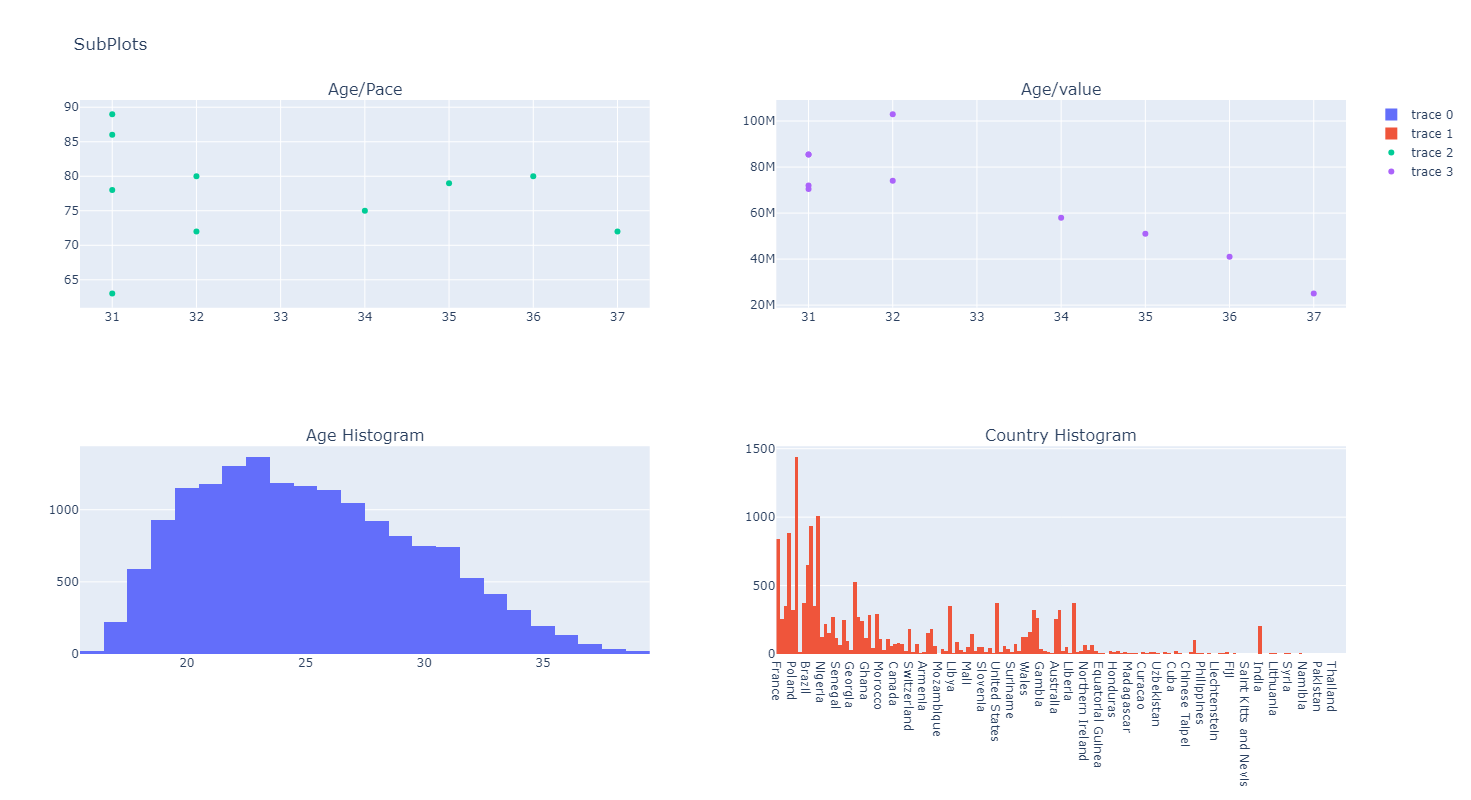

In [20]:

fig = make_subplots(rows=2, cols=2, start_cell="bottom-left",subplot_titles=('Age Histogram',  'Country Histogram','Age/Pace',  'Age/value'))

fig.add_trace(go.Histogram(x=data["age"]))

fig.add_trace(go.Histogram(x=data["nationality_name"]),
              row=1, col=2)

fig.add_trace(go.Scatter(mode='markers',x=data['age'][data['age'] > 30 ].head(10), y=data['pace'][data['age'] > 30 ].head(10)),
              row=2, col=1)

fig.add_trace(go.Scatter(mode='markers',x=data['age'][data['age'] > 30 ].head(10), y=data['value_eur'][data['age'] > 30 ].head(10)),
              row=2, col=2)

fig.update_layout(height=800, width=1400, title_text="SubPlots")

fig.show()


In [21]:
data['nationality_name'].value_counts().head(10)

nationality_name
England                1442
Germany                1011
Spain                   936
Argentina               884
France                  841
Brazil                  647
Italy                   525
Netherlands             373
United States           371
Republic of Ireland     370
Name: count, dtype: int64

In [22]:
# Mean per nationality
data.groupby('nationality_name').age.mean().head(20)

nationality_name
Albania                   25.709091
Algeria                   25.015625
Angola                    25.681818
Antigua and Barbuda       26.000000
Argentina                 26.214932
Armenia                   26.083333
Australia                 23.884170
Austria                   24.991803
Azerbaijan                22.800000
Belarus                   25.000000
Belgium                   23.739130
Benin                     26.400000
Bermuda                   33.000000
Bolivia                   24.898990
Bosnia and Herzegovina    26.310345
Brazil                    27.233385
Bulgaria                  25.736842
Burkina Faso              23.380952
Burundi                   24.000000
Cameroon                  25.333333
Name: age, dtype: float64

In [23]:

data.dropna(subset=['overall'], inplace=True, axis=0)
data['overall'] = data['overall'].astype(np.int64)

# Mean Overall per nationality

new_db = pd.DataFrame({'Mean Overall': data.groupby('nationality_name').overall.mean()
, 'Count': data['nationality_name'].value_counts()})

# top 10 counties that have more than 300 players
new_db[new_db["Count"] > 300 ].sort_values(by="Count", ascending=False).head(10)


,Mean Overall,Count
nationality_name,,
England,63.972954,1442
Germany,65.960435,1011
Spain,69.422009,936
Argentina,68.704751,884
France,67.875149,841
Brazil,71.063369,647
Italy,68.146667,525
Netherlands,68.048257,373
United States,63.080863,371


In [24]:
# Mean Salary per nationality

new_db = pd.DataFrame({'Mean Salary': data.groupby('nationality_name').value_eur.mean()
, 'Count': data['nationality_name'].value_counts()})

# top 10 counties that have more than 300 players
new_db[new_db["Count"] > 300 ].sort_values(by="Mean Salary", ascending=False).head(10)

,Mean Salary,Count
nationality_name,,
Portugal,6.389186e+06,350
Brazil,5.614274e+06,647
Spain,5.061747e+06,936
Netherlands,5.017038e+06,373
France,4.912652e+06,841
Italy,4.394724e+06,525
Argentina,3.277658e+06,884
Germany,2.951128e+06,1011
England,2.485055e+06,1442


In [25]:
# Find Correlations 
cor_list = ['overall','pace','age','skill_moves',"value_eur"]
for r1 in cor_list:
    print(f"{4 * '-'} {r1} {4 * '-'} \n")
    for r2 in cor_list:
        if r1 != r2:
            print(f"Correlation between {r1} and {r2} is : {round(data[r1].corr(data[r2]),2)}")
    print("\n")

---- overall ---- 

Correlation between overall and pace is : 0.18
Correlation between overall and age is : 0.44
Correlation between overall and skill_moves is : 0.4
Correlation between overall and value_eur is : 0.56


---- pace ---- 

Correlation between pace and overall is : 0.18
Correlation between pace and age is : -0.19
Correlation between pace and skill_moves is : 0.4
Correlation between pace and value_eur is : 0.18


---- age ---- 

Correlation between age and overall is : 0.44
Correlation between age and pace is : -0.19
Correlation between age and skill_moves is : 0.13
Correlation between age and value_eur is : 0.04


---- skill_moves ---- 

Correlation between skill_moves and overall is : 0.4
Correlation between skill_moves and pace is : 0.4
Correlation between skill_moves and age is : 0.13
Correlation between skill_moves and value_eur is : 0.27


---- value_eur ---- 

Correlation between value_eur and overall is : 0.56
Correlation between value_eur and pace is : 0.18
Correla

In [26]:
# Mean age per club name for Premier League
data[data["league_name"] == "Premier League"].groupby('club_name').age.mean().sort_values().head(20)

club_name
Chelsea                    22.310345
Shakhtar Donetsk           23.360000
Arsenal                    23.750000
Dynamo Kyiv                23.750000
Liverpool                  23.888889
Crystal Palace             24.000000
Sheffield United           24.133333
Tottenham Hotspur          24.192308
Manchester City            24.200000
Brentford                  24.250000
AFC Bournemouth            24.321429
Wolverhampton Wanderers    24.416667
Aston Villa                24.433333
Burnley                    24.448276
Manchester United          24.566667
Brighton & Hove Albion     24.615385
West Ham United            24.800000
Newcastle United           25.178571
Everton                    25.320000
Nottingham Forest          25.428571
Name: age, dtype: float64

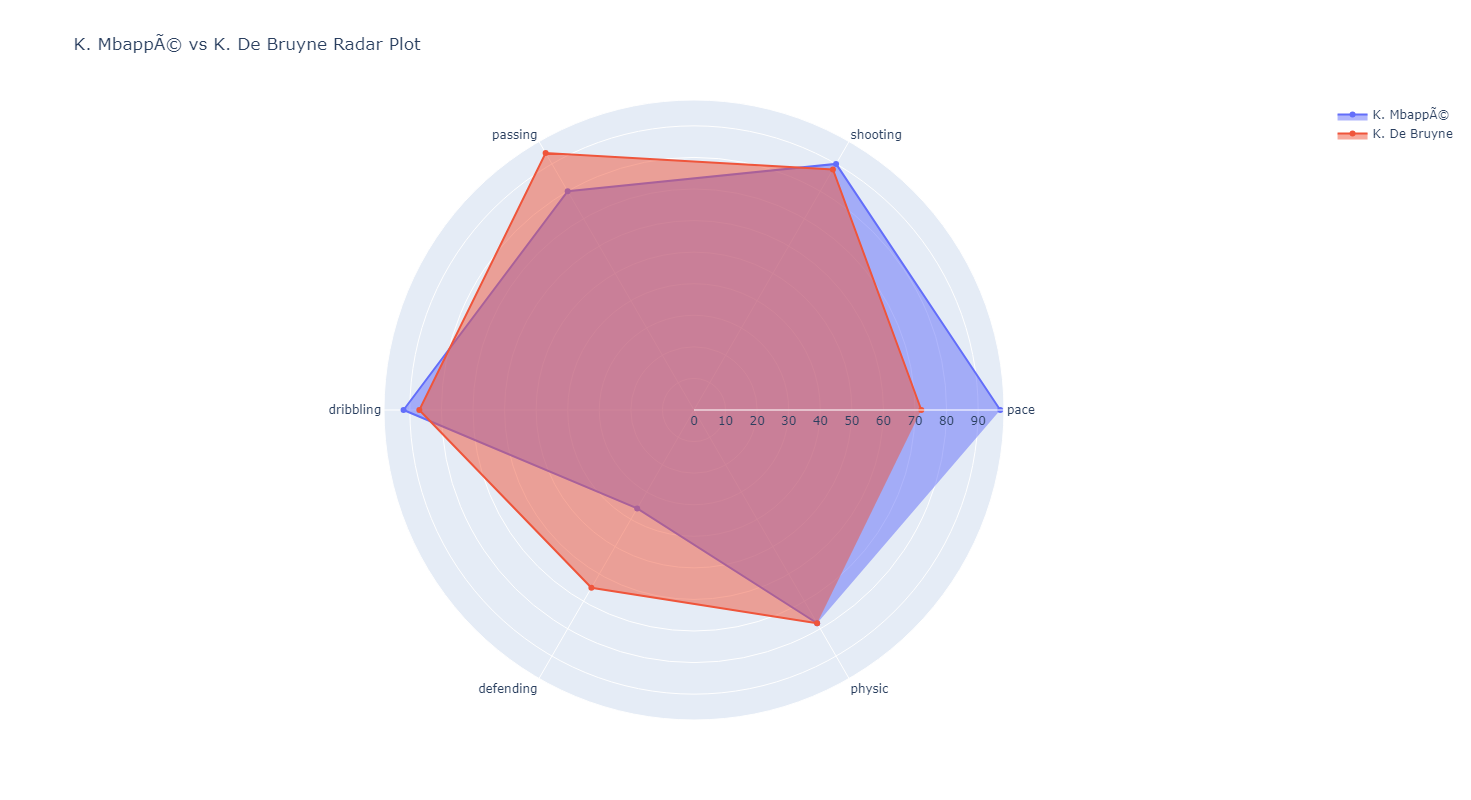

In [27]:

stat_labels = ['pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',]

player_one_name = "K. MbappÃ©"
player_two_name = "K. De Bruyne"

player_one = data[stat_labels][data['short_name']== player_one_name] 
player_two = data[stat_labels][data['short_name']== player_two_name] 
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=player_one.iloc[0],
      theta=stat_labels,
      fill='toself',
      name=player_one_name
))
fig.add_trace(go.Scatterpolar(
      r=player_two.iloc[0],
      theta=stat_labels,
      fill='toself',
      name=player_two_name
))

fig.update_layout(height=800, width=1200, title_text=f"{player_one_name} vs {player_two_name} Radar Plot")

fig.show()

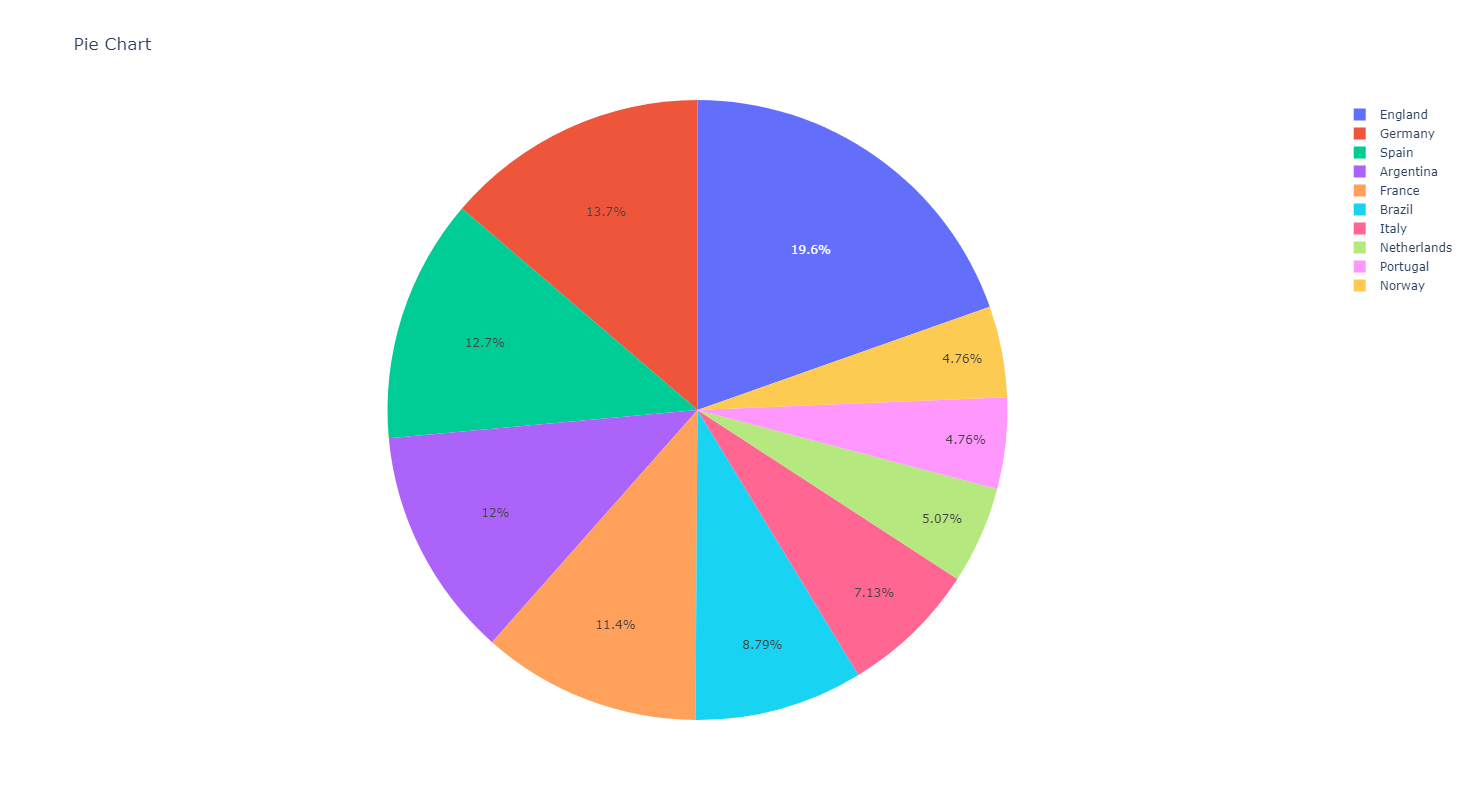

In [28]:
new_db = pd.DataFrame({'Mean Salary': data.groupby('nationality_name').value_eur.mean()
, 'Count': data['nationality_name'].value_counts()})

# top 10 counties that have more than 300 players
new_db = new_db[new_db["Count"] > 300 ].sort_values(by="Mean Salary", ascending=False).head(10)

labels = list(new_db.index)
values = new_db["Count"]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(height=800, width=1200, title_text=f"Pie Chart")
fig.show()

In [29]:
# Fastest Nationalities
# Mean Overall per nationality
new_db = pd.DataFrame({'Mean Pace': data.groupby('nationality_name').pace.mean()
, 'Count': data['nationality_name'].value_counts()})

# top 10 counties that have more than 300 players
new_db[new_db["Count"] > 300 ].sort_values(by="Mean Pace", ascending=False).head(10)

,Mean Pace,Count
nationality_name,,
Brazil,70.097372,647
Portugal,69.320000,350
Norway,68.945714,350
Netherlands,68.831099,373
England,68.497920,1442
Poland,68.383648,318
Saudi Arabia,68.329154,319
Germany,68.208704,1011
Argentina,68.200226,884


In [30]:
feature_cols=[
 'age', 
'height_cm',
'weight_kg',
'overall', 
'wage_eur',
'skill_moves',
'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure','ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',            
 'gk',
    ]


## Label Encoding

In [498]:
label_encoder = preprocessing.LabelEncoder() 
d1 = data.drop_duplicates('preferred_foot').set_index('preferred_foot')

data['preferred_foot_encoded']= label_encoder.fit_transform(data['preferred_foot']) 

data.head()

,player_id,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,club_position,club_jersey_number,nationality_name,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,preferred_foot_encoded
0,231747,K. MbappÃ©,"ST, LW",91,94,181500000.0,230000.0,24,182,75,Paris Saint Germain,Ligue 1,LW,7,France,LW,10,Right,4,5,High/Low,Unique,Yes,349400000,97,90,80,92,36,78,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88,26,34,32,13,5,7,11,6,93,93,93,91,91,91,91,91,92,92,92,92,84,84,84,92,71,66,66,66,71,66,57,57,57,66,21,1
2,192985,K. De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,181,75,Manchester City,Premier League,SUB,17,Belgium,CAM,7,Right,5,4,High/Medium,Unique,Yes,190600000,72,88,94,87,65,78,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88,66,70,53,15,13,5,10,13,86,86,86,87,88,88,88,87,91,91,91,91,91,91,91,91,82,83,83,83,82,78,73,73,73,78,24,1
1,239085,E. Haaland,ST,91,94,185000000.0,340000.0,22,195,94,Manchester City,Premier League,ST,9,Norway,ST,9,Left,3,3,High/Medium,Unique,Yes,356100000,89,93,66,80,45,88,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87,38,47,29,7,14,13,11,7,93,93,93,82,86,86,86,82,85,85,85,82,77,77,77,82,65,66,66,66,65,63,65,65,65,63,22,0
3,158023,L. Messi,"CF, CAM",90,90,41000000.0,23000.0,36,169,67,Inter Miami,Major League Soccer,RF,10,Argentina,RW,10,Left,4,4,Low/Low,Unique,Yes,61500000,80,87,90,94,33,64,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96,20,35,24,6,11,15,14,8,88,88,88,90,89,89,89,90,92,92,92,90,88,88,88,90,67,66,66,66,67,62,52,52,52,62,22,0
4,165153,K. Benzema,"CF, ST",90,90,51000000.0,95000.0,35,185,81,Al Ittihad,Pro League,RS,9,France,NaN,NaN,Right,4,4,Medium/Medium,Normal (170-185),Yes,81600000,79,88,83,87,39,78,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90,43,24,18,13,11,5,5,7,90,90,90,86,89,89,89,86,90,90,90,89,85,85,85,89,67,67,67,67,67,63,58,58,58,63,21,1


## Decision Tree

In [501]:
clf=DecisionTreeClassifier(criterion="entropy",max_depth=150)
clf.fit(X_train, y_train)
X=data[feature_cols]
Y=data['preferred_foot_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
"DC Entropy Accuracy:",round(metrics.accuracy_score(y_test,y_pred),2) # 041

('DC Entropy Accuracy:', 0.4)

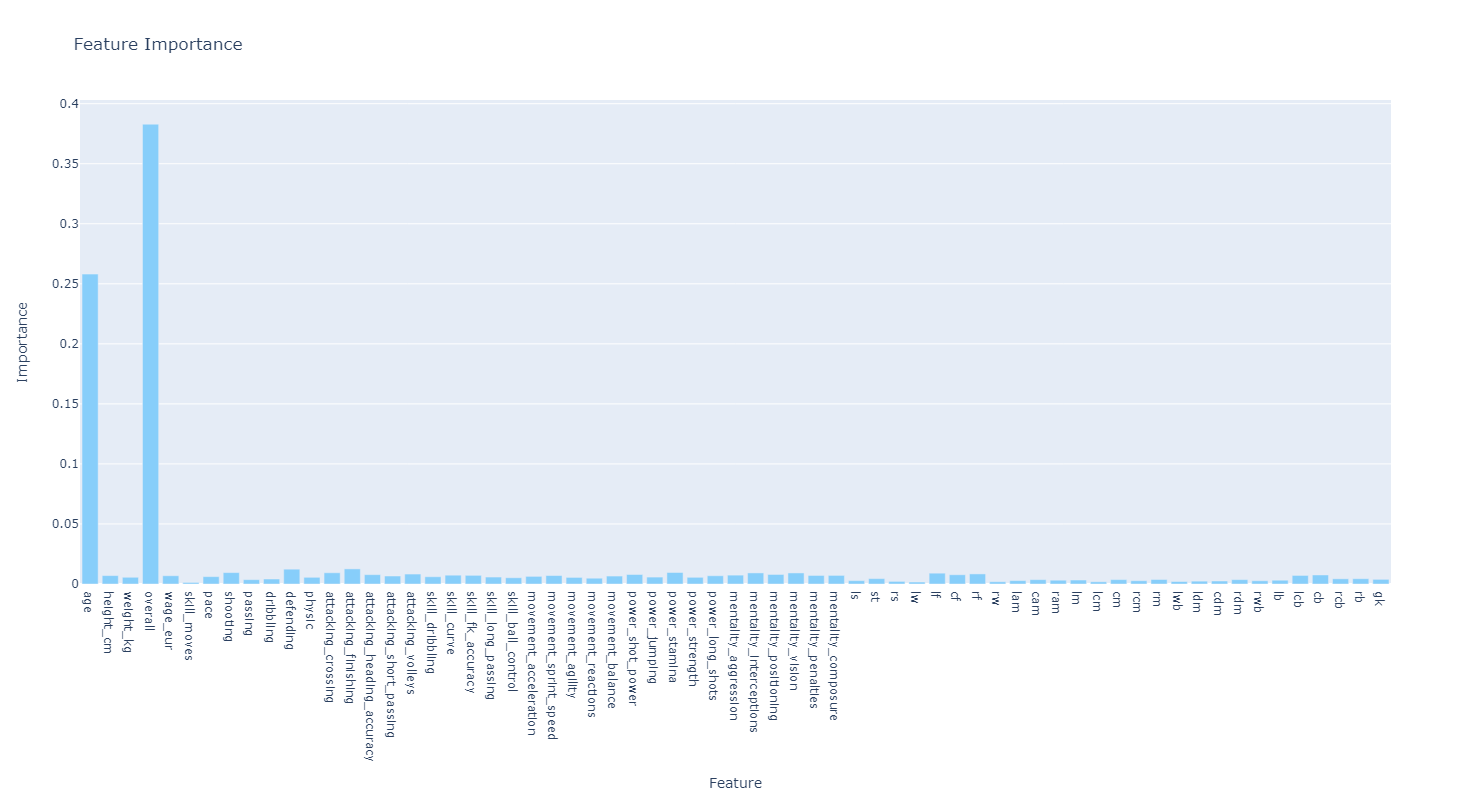

In [502]:
importances = clf.feature_importances_
feature_names = X.columns
fig = go.Figure()
fig.add_trace(go.Bar(
    x=feature_names,
    y=importances,
    marker_color='lightskyblue',
    name='Feature Importance'
))
fig.update_layout(
    title="Feature Importance",
    xaxis_title="Feature",
    yaxis_title="Importance",
    height=800, width=1200,
)
fig.show()

## Random Forest

In [505]:
RFC=RandomForestClassifier(n_estimators=50, random_state=42)
RFC=RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)
"Random Forest Accuracy:",round(metrics.accuracy_score(y_test,y_pred),2)  # 0.63

('Random Forest Accuracy:', 0.24)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
# Linear Regression model
clf = LinearRegression()
clf.fit(X_train, y_train)

# Predicting values
predicted = clf.predict(X_test)

# Create a scatter plot
fig = go.Figure()

# Add predicted values
fig.add_trace(go.Scatter(
    x=y_test,
    y=predicted,
    mode='markers',
    name='Predicted'
))

# Add expected values
fig.add_trace(go.Scatter(
    x=y_test,
    y=y_test,
    mode='lines',
    name='Expected',
    line=dict(color='black', dash='dash')
))

# Update layout
fig.update_layout(
    title="Predicted vs Expected Value (EUR)",
    xaxis_title="Expected Value (EUR)",
    yaxis_title="Predicted Value (EUR)",
    height=800, width=1200,
)

# Show plot
fig.show()

In [397]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 19063852442909.766
R-squared (R2) Score: 0.7112335206863049


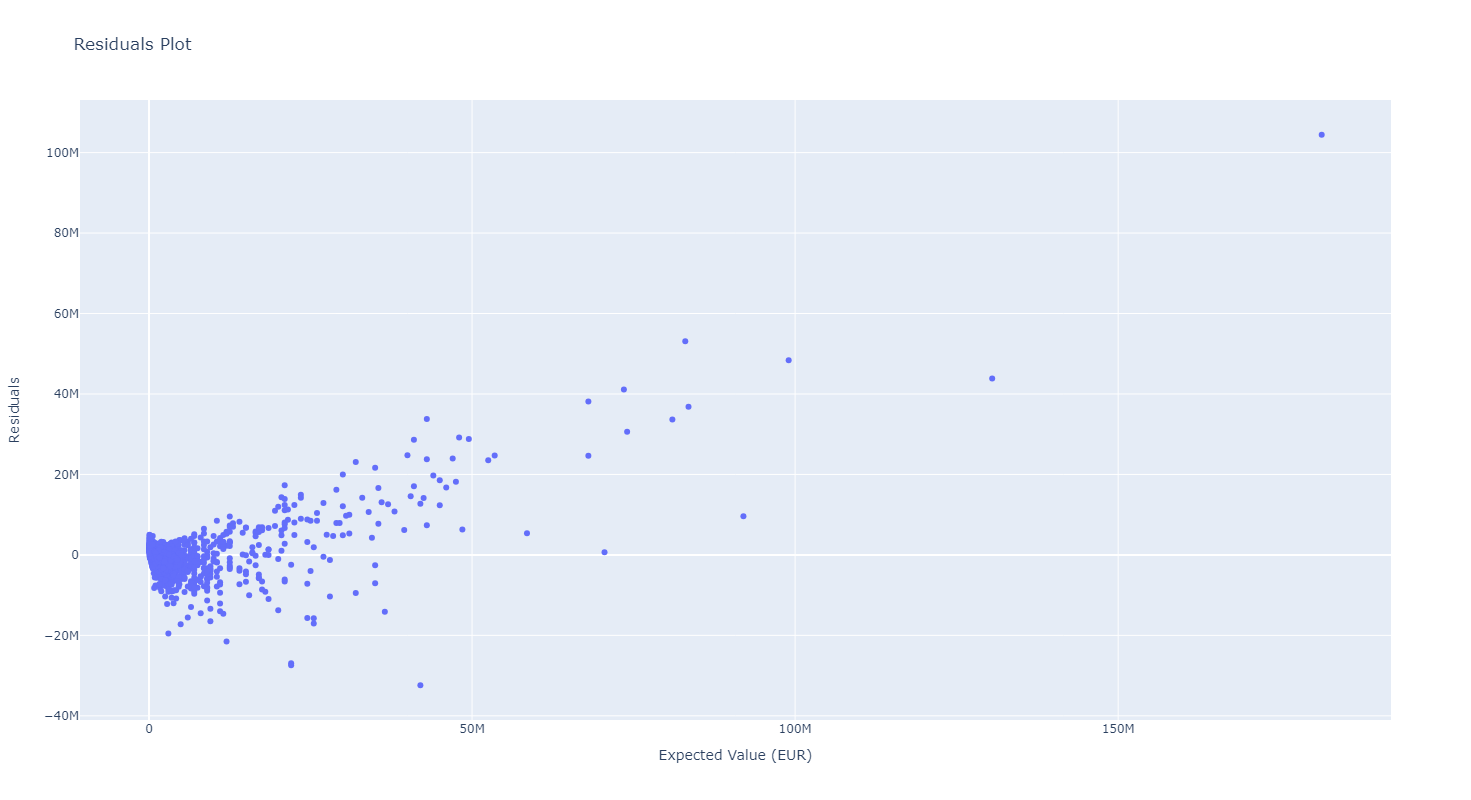

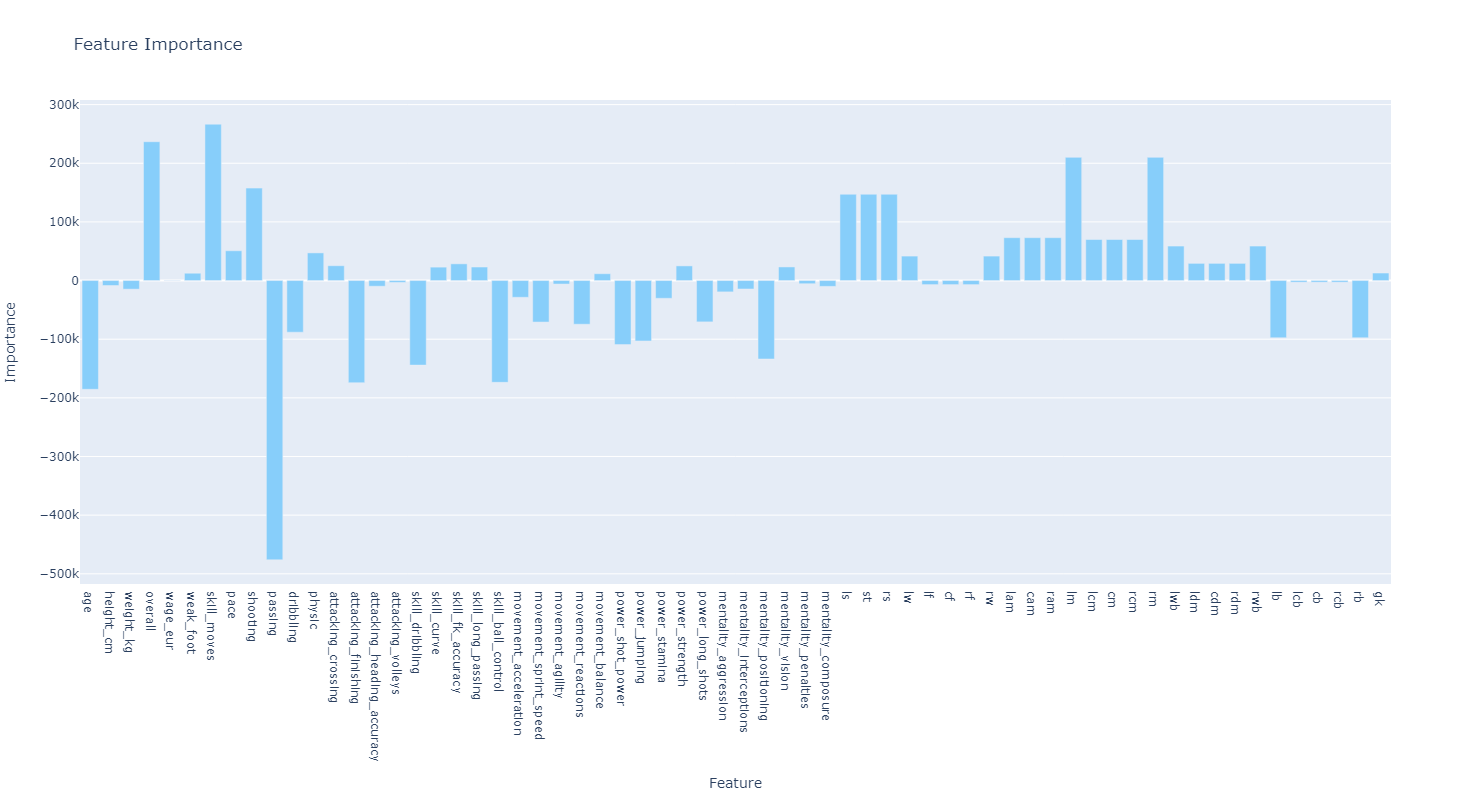

In [401]:
# Calculate residuals
residuals = y_test - predicted

# Plot residuals
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=y_test,
    y=residuals,
    mode='markers',
    name='Residuals'
))
fig.update_layout(
    title="Residuals Plot",
    xaxis_title="Expected Value (EUR)",
    yaxis_title="Residuals",
    height=800, width=1200,
)

fig.show()

# Plot feature importance (Coefficient)
importances = clf.coef_
feature_names = X.columns

fig = go.Figure()
fig.add_trace(go.Bar(
    x=feature_names,
    y=importances,
    marker_color='lightskyblue',
    name='Feature Importance'
))
fig.update_layout(
    title="Feature Importance",
    xaxis_title="Feature",
    yaxis_title="Importance",
    height=800, width=1200,
)
fig.show()